# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


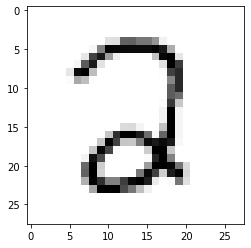

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.20222691836766057
train accuracy is: 0.7945251210148556, test accuracy is 0.8185483870967742


Epoch 10 Loss 0.05436883429916238
train accuracy is: 0.9465030879652813, test accuracy is 0.952116935483871


Epoch 20 Loss 0.0380432944209968
train accuracy is: 0.9608579535970623, test accuracy is 0.9672379032258065


Epoch 30 Loss 0.03184394401824145
train accuracy is: 0.9661158404273076, test accuracy is 0.9692540322580645


Epoch 40 Loss 0.028348744654845347
train accuracy is: 0.9691203471874479, test accuracy is 0.9707661290322581


Epoch 50 Loss 0.025983945590595334
train accuracy is: 0.9702053079619429, test accuracy is 0.9742943548387096


Epoch 60 Loss 0.024214985686759977
train accuracy is: 0.972375229510933, test accuracy is 0.9753024193548387


Epoch 70 Loss 0.022799997678772846
train accuracy is: 0.9744616925388082, test accuracy is 0.9758064516129032


Epoch 80 Loss 0.021623686206103696
train accuracy is: 0.9756301118344183, test accuracy is 0.9768145161290323


Epoch 90 Loss 0.020611188384289814
train accuracy is: 0.9771323652144884, test accuracy is 0.9783266129032258


Epoch 100 Loss 0.019720145192907462
train accuracy is: 0.9783007845100985, test accuracy is 0.9783266129032258


Epoch 110 Loss 0.01891295788904981
train accuracy is: 0.9796361208479386, test accuracy is 0.9798387096774194


Epoch 120 Loss 0.018179289309677722
train accuracy is: 0.9804707060590886, test accuracy is 0.9793346774193549


Epoch 130 Loss 0.017506889246234565
train accuracy is: 0.9815556668335838, test accuracy is 0.9793346774193549


Epoch 140 Loss 0.01689275531046109
train accuracy is: 0.9823067935236187, test accuracy is 0.9808467741935484


Epoch 150 Loss 0.016315531853167014
train accuracy is: 0.9825571690869638, test accuracy is 0.9828629032258065


Epoch 160 Loss 0.015777568973226144
train accuracy is: 0.9831413787347688, test accuracy is 0.983366935483871


Epoch 170 Loss 0.015258537686881535
train accuracy is: 0.9838090469036889, test accuracy is 0.983366935483871


Epoch 180 Loss 0.01478146096433851
train accuracy is: 0.9843097980303789, test accuracy is 0.9838709677419355


Epoch 190 Loss 0.014327994818188297
train accuracy is: 0.9848940076781839, test accuracy is 0.983366935483871


Epoch 200 Loss 0.01390214262944101
train accuracy is: 0.985561675847104, test accuracy is 0.983366935483871


Epoch 210 Loss 0.013483175293671348
train accuracy is: 0.986062426973794, test accuracy is 0.983366935483871


Epoch 220 Loss 0.01309685442272481
train accuracy is: 0.9865631781004841, test accuracy is 0.983366935483871


Epoch 230 Loss 0.012723619256141652
train accuracy is: 0.9871473877482891, test accuracy is 0.983366935483871


Epoch 240 Loss 0.012365900512657787
train accuracy is: 0.9878150559172092, test accuracy is 0.9848790322580645


0.005869798363062974

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.28774311265395647
train accuracy is: 0.47638123852445335, test accuracy is 0.4657258064516129


Epoch 10 Loss 0.10563983133567852
train accuracy is: 0.9098647971957937, test accuracy is 0.9238911290322581


Epoch 20 Loss 0.08002044653831966
train accuracy is: 0.9263895843765648, test accuracy is 0.9395161290322581


Epoch 30 Loss 0.06882664138250714
train accuracy is: 0.9332331831079953, test accuracy is 0.9450604838709677


Epoch 40 Loss 0.062171834183741496
train accuracy is: 0.9395760307127358, test accuracy is 0.9546370967741935


Epoch 50 Loss 0.05763850091056084
train accuracy is: 0.9419128693039559, test accuracy is 0.9571572580645161


Epoch 60 Loss 0.054300973307915584
train accuracy is: 0.9446670005007511, test accuracy is 0.9591733870967742


Epoch 70 Loss 0.05171761790196236
train accuracy is: 0.9470872976130863, test accuracy is 0.9616935483870968


Epoch 80 Loss 0.04964159100828611
train accuracy is: 0.9489233850776164, test accuracy is 0.9616935483870968


Epoch 90 Loss 0.04792722994871243
train accuracy is: 0.9506760140210315, test accuracy is 0.9621975806451613


Epoch 100 Loss 0.04648074972062957
train accuracy is: 0.9522617259222167, test accuracy is 0.9627016129032258


Epoch 110 Loss 0.04523910059765807
train accuracy is: 0.9534301452178268, test accuracy is 0.9637096774193549


Epoch 120 Loss 0.04415844716618005
train accuracy is: 0.9541812719078618, test accuracy is 0.9637096774193549


Epoch 130 Loss 0.043206005786788605
train accuracy is: 0.9549323985978968, test accuracy is 0.9642137096774194


Epoch 140 Loss 0.04235780333116376
train accuracy is: 0.9556835252879319, test accuracy is 0.9642137096774194


Epoch 150 Loss 0.04159730467690995
train accuracy is: 0.956434651977967, test accuracy is 0.9637096774193549


Epoch 160 Loss 0.040908741563788535
train accuracy is: 0.957436154231347, test accuracy is 0.9647177419354839


Epoch 170 Loss 0.04028285970205004
train accuracy is: 0.9578534468369221, test accuracy is 0.9647177419354839


Epoch 180 Loss 0.03970924820049172
train accuracy is: 0.9581872809213821, test accuracy is 0.9647177419354839


Epoch 190 Loss 0.039182738801081314
train accuracy is: 0.9584376564847271, test accuracy is 0.9647177419354839


Epoch 200 Loss 0.03869490714408934
train accuracy is: 0.9588549490903021, test accuracy is 0.9652217741935484


Epoch 210 Loss 0.03824273165384235
train accuracy is: 0.9591053246536472, test accuracy is 0.9657258064516129


Epoch 220 Loss 0.03782157178839162
train accuracy is: 0.9593557002169921, test accuracy is 0.9657258064516129


Epoch 230 Loss 0.03742856689686644
train accuracy is: 0.9599399098647972, test accuracy is 0.9647177419354839


Epoch 240 Loss 0.037058957685444406
train accuracy is: 0.9600233683859122, test accuracy is 0.9652217741935484


0.049948196637928335

### Comparing results of NN and LR

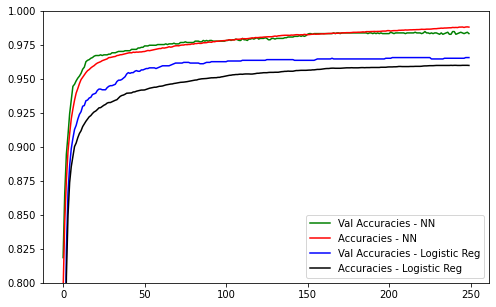

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

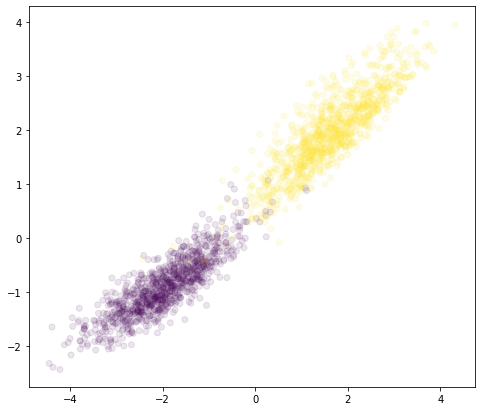

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

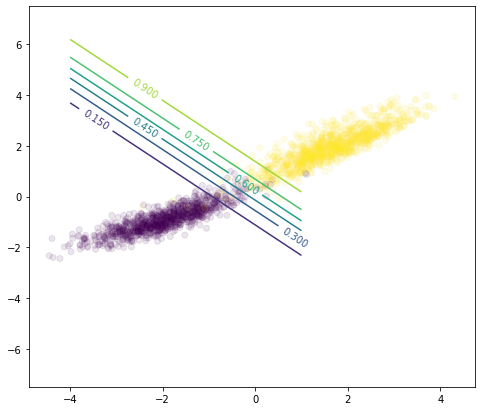

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );